In [2]:
import torch
import sys
sys.path.append(r"./src")
from module.astar import NeuralAstar, VanillaAstar
from train_utils.threat_planner import load_from_ptl_checkpoint

device = "cuda" if torch.cuda.is_available() else "cpu"
assert(device == "cuda")

neural_astar = NeuralAstar(encoder_arch="Unet", encoder_depth=5).to(device)
vanilla_astar = VanillaAstar().to(device)
neural_astar.load_state_dict(load_from_ptl_checkpoint("model/all_data/lightning_logs/"))

load model/all_data/lightning_logs\version_7\checkpoints\epoch=384-step=24640.ckpt


<All keys matched successfully>

Number of Train Samples: 800
	Size: 32x32


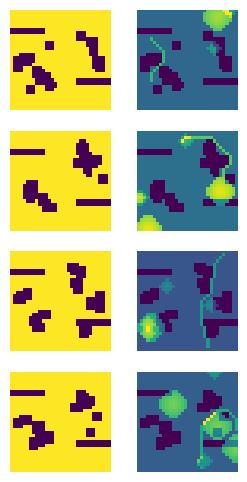

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from data_utils.threaten_data import create_threat_dataloader

data_loader = create_threat_dataloader("experiment-datasets/data/mpd_with_multithreat/forest_032_moore_c0.npz", "train", 4, shuffle=True)
map_designs, start_maps, goal_maps, threat_maps, opt_trajs = next(iter(data_loader))

fig, axes = plt.subplots(4, 2, figsize=[3, 6])
for i in range(4):
    axes[i][0].imshow(map_designs[i][0])
    axes[i][0].axis("off")
    axes[i][1].imshow((map_designs + opt_trajs + threat_maps / 10)[i][0])
    axes[i][1].axis("off")

torch.Size([4, 1, 32, 32])
na done
va done


(-0.5, 137.5, 35.5, -0.5)

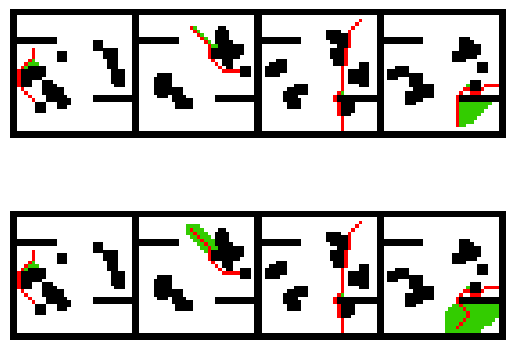

In [21]:
from data_utils.visualize import visualize_results
neural_astar.eval()
vanilla_astar.eval()

print(map_designs.shape)
na_outputs = neural_astar(map_designs.to(device), start_maps.to(device), goal_maps.to(device), threat_maps.to(device))
print("na done")
va_outputs = vanilla_astar(map_designs.to(device), start_maps.to(device), goal_maps.to(device), threat_maps.to(device))
print("va done")

fig, axes = plt.subplots(2, 1)
axes[0].imshow(visualize_results(map_designs, na_outputs))
axes[0].axis("off")
axes[1].imshow(visualize_results(map_designs, va_outputs))
axes[1].axis("off")

Number of Test Samples: 100
	Size: 32x32


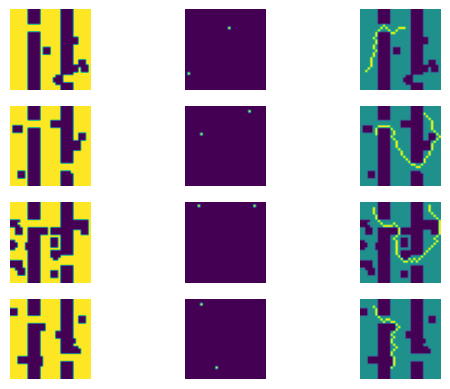

In [2]:
import matplotlib.pyplot as plt
from data_utils.maze_data import create_dataloader

data_loader = create_dataloader("planning-datasets/data/mpd/gaps_and_forest_032_moore_c8.npz", "test", 4, shuffle=True)
map_designs, start_maps, goal_maps, opt_trajs = next(iter(data_loader))

task_maps = start_maps + goal_maps


fig, axes = plt.subplots(4, 3)
for i in range(4):
    axes[i][0].imshow(map_designs[i][0])
    axes[i][0].axis("off")
    axes[i][1].imshow(task_maps[i][0])
    axes[i][1].axis("off")
    axes[i][2].imshow((opt_trajs + map_designs)[i][0])
    axes[i][2].axis("off")

d:\Application\miniconda3\envs\pytorch\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(-0.5, 137.5, 35.5, -0.5)

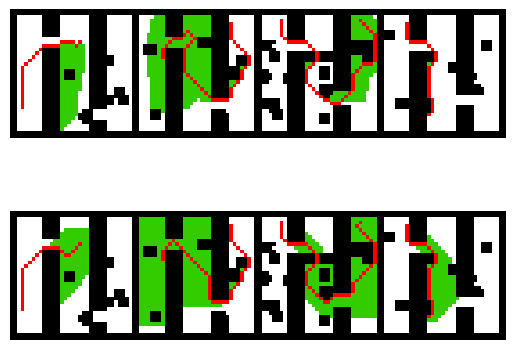

In [3]:
from data_utils.visualize import visualize_results

neural_astar.eval()
vanilla_astar.eval()

na_outputs = neural_astar(map_designs.to(device), start_maps.to(device), goal_maps.to(device))
va_outputs = vanilla_astar(map_designs.to(device), start_maps.to(device), goal_maps.to(device))

fig, axes = plt.subplots(2, 1)
axes[0].imshow(visualize_results(map_designs, na_outputs))
axes[0].axis("off")
axes[1].imshow(visualize_results(map_designs, va_outputs))
axes[1].axis("off")